#COVID-19 - Pandemic in India!

##About COVID-19

The **coronavirus (COVID-19)** pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily. The government is working to slow down its spread.

Till date it has spread across 215 countries infecting 5,491,194 people and killing 346,331 so far. In India, as many as 138,536 COVID-19 cases have been reported so far. Of these, 57,692 have recovered and 4,024 have died. 
COVID19 

**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

![alt text](https://i.imgur.com/nf2kMhF.jpg)

##Problem Statement:

India has responded quickly, implementing a proactive, nationwide, lockdown, to flatten the curve and use the time to plan and resource responses adequately. As of 23rd May 2020, India has witnessed 3720 deaths from 32 States and Union Territories, with a total of 123202 confirmed cases due to COVID-19. Globally the Data Scientists are using AI and machine learning to analyze, predict, and take safety measures against COVID-19 in India. 

### Goal:
We need a explore the COVID situation in India and the world, and strong model that predicts how the virus could spread across India in the next 15 days.
###Tasks to be performed:
- Analyze the present condition in India
- Scrape out the COVID-19 from websites
- Figure out the death rate and cure rate per 100 across the affected states
- Create different charts to visualize the following: 
 - Age group distribution of affected patients
 - Total sample test done till date
 - Growth rate of COVID in top 15 states
 - Top 10 States in each health facility
 - State wise testing insight
- ICMR testing centres in each state
- Use Prophet to predict the confirmed cases in India
- Use ARIMA to predict the confirmed cases in India
- Compare the Indian COVID cases globally

###Importing the required libraries

In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1: Analysing the present condition in India


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
###COVID-19 in India - Timeline
 <br>


##Recent COVID-19 updates in India

- Sikkim on Saturday reported its first +ve COVID-19 case
- With over 6,500 fresh cases, the Covid in India rose to 1,25,101 on Saturday morning, with 3,720 fatalities
- West Bengal asks Railways not to send migrant trains to State till May 26 in view of Cyclone Amphan
- 196 new COVID 19 positive cases were reported in Karnataka on Saturday
- Complete lockdown in Bengaluru on Sunday. 
 - Bruhat Bengaluru Mahanagara Palike (BBMP) Commissioner B.H. Anil Kumar said the conditions and restrictions on Sunday will be similar to that under coronavirus lockdown 1.0.


## How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


## 1.1 Scraping the datasets from the [official Govt. website](https://www.mohfw.gov.in)


In [2]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [3]:
# get data

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [4]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [5]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [6]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,14274,16464,365,31103
2,Arunachal Pradesh,240,145,2,387
3,Assam,5876,10894,36,16806
4,Bihar,5482,12317,160,17959
5,Chandigarh,157,423,8,588
6,Chhattisgarh,996,3202,19,4217
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495
8,Delhi,19017,91312,3411,113740
9,Goa,1026,1540,17,2583


# Data Cleaning

In [7]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [8]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [9]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14,11.7401,92.6586
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14,15.9129,79.7400
2,Arunachal Pradesh,240,145,2,387,2020-07-14,28.2180,94.7278
3,Assam,5876,10894,36,16806,2020-07-14,26.2006,92.9376
4,Bihar,5482,12317,160,17959,2020-07-14,25.0961,85.3131
5,Chandigarh,157,423,8,588,2020-07-14,30.7333,76.7794
6,Chhattisgarh,996,3202,19,4217,2020-07-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14,NaN,NaN
8,Delhi,19017,91312,3411,113740,2020-07-14,28.7041,77.1025
9,Goa,1026,1540,17,2583,2020-07-14,15.2993,74.1240


In [10]:

# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [11]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [12]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      2
Longitude                     2
dtype: int64

In [13]:
# number of unique values 
df_India.nunique()

State/UnionTerritory          35
Active Cases*                 35
Cured/Discharged/Migrated*    35
Deaths                        26
Total Confirmed cases*        35
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

# Saving data

In [15]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/drive/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)

In [16]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [17]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

## Final dataframe

In [18]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14,11.7401,92.6586
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14,15.9129,79.7400
2,Arunachal Pradesh,240,145,2,387,2020-07-14,28.2180,94.7278
3,Assam,5876,10894,36,16806,2020-07-14,26.2006,92.9376
4,Bihar,5482,12317,160,17959,2020-07-14,25.0961,85.3131
5,Chandigarh,157,423,8,588,2020-07-14,30.7333,76.7794
6,Chhattisgarh,996,3202,19,4217,2020-07-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14,NaN,NaN
8,Delhi,19017,91312,3411,113740,2020-07-14,28.7041,77.1025
9,Goa,1026,1540,17,2583,2020-07-14,15.2993,74.1240


In [19]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        35 non-null     object        
 1   Active Cases*               35 non-null     object        
 2   Cured/Discharged/Migrated*  35 non-null     object        
 3   Deaths                      35 non-null     object        
 4   Total Confirmed cases*      35 non-null     object        
 5   Date                        35 non-null     datetime64[ns]
 6   Latitude                    33 non-null     float64       
 7   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


## Save as .csv file

In [20]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/drive/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [22]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/drive/2020_07_14 - COVID-19_India_preprocessed.csv')
df_india = df.copy()
df

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-14,11.7401,92.6586
1,Andhra Pradesh,14274,16464,365,31103,2020-07-14,15.9129,79.7400
2,Arunachal Pradesh,240,145,2,387,2020-07-14,28.2180,94.7278
3,Assam,5876,10894,36,16806,2020-07-14,26.2006,92.9376
4,Bihar,5482,12317,160,17959,2020-07-14,25.0961,85.3131
5,Chandigarh,157,423,8,588,2020-07-14,30.7333,76.7794
6,Chhattisgarh,996,3202,19,4217,2020-07-14,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495,2020-07-14,NaN,NaN
8,Delhi,19017,91312,3411,113740,2020-07-14,28.7041,77.1025
9,Goa,1026,1540,17,2583,2020-07-14,15.2993,74.1240


## 1.2 Analysing COVID19 Cases in India

In [23]:
total_cases = df['Total Confirmed cases*'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (14th July, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (14th July, 2020): 904573


In [24]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = True) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,14274,16464,365,31103
2,Arunachal Pradesh,240,145,2,387
3,Assam,5876,10894,36,16806
4,Bihar,5482,12317,160,17959
5,Chandigarh,157,423,8,588
6,Chhattisgarh,996,3202,19,4217
7,Dadra and Nagar Haveli and Daman and Diu,226,268,1,495
8,Delhi,19017,91312,3411,113740
9,Goa,1026,1540,17,2583


In [25]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Total Confirmed cases*'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_07_14 are:  571460
Total people who were detected COVID+ve as of 2020_07_14 are:  904573
Total people who died due to COVID19 as of 2020_07_14 are:  23727
Total active COVID19 cases as of 2020_07_14 are:  309386


In [26]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total Confirmed cases*'] - (df['Deaths'] + df['Cured/Discharged/Migrated*'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 309386


,Total Active
State/UnionTerritory,
Maharashtra,105935
Tamil Nadu,48199
Karnataka,24576
Delhi,19017
Andhra Pradesh,14274
Uttar Pradesh,12972
Telangana,12177
West Bengal,11279
Gujarat,10897


In [27]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Total Confirmed cases*','Deaths','Cured/Discharged/Migrated*'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Total Confirmed cases*'] - (state_cases['Deaths']+state_cases['Cured/Discharged/Migrated*'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Total Confirmed cases*"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured/Discharged/Migrated*"]/state_cases["Total Confirmed cases*"],2)
state_cases.sort_values('Total Confirmed cases*', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Total Confirmed cases*"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured/Discharged/Migrated*"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Total Confirmed cases*,Deaths,Cured/Discharged/Migrated*,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,260924,10482,144507,105935,4.020000,55.380000
29,Tamil Nadu,142798,2032,92567,48199,1.420000,64.820000
8,Delhi,113740,3411,91312,19017,3.000000,80.280000
10,Gujarat,42722,2055,29770,10897,4.810000,69.680000
15,Karnataka,41581,757,16248,24576,1.820000,39.080000
32,Uttar Pradesh,38130,955,24203,12972,2.500000,63.470000
30,Telangana,36221,365,23679,12177,1.010000,65.370000
34,West Bengal,31448,956,19213,11279,3.040000,61.090000
1,Andhra Pradesh,31103,365,16464,14274,1.170000,52.930000
27,Rajasthan,24936,525,18630,5781,2.110000,74.710000


**Visualization Inference:** 

* Almost +1,611 cases of COVID-19 has been reported today (23rd May) taking total cases to 123202. 
* The cases have been confirmed across 32 states and union territories. 
* Out of 123202 cases, 51784 people have been cured, discharged or migrated.
* Maharashtra, Tamilnaidu, Gujrat and Delhi are worsely affected states with maximum number of confirmed cases
* Till 23rd of May 3720 people have died in India


##Finding more detail COVID Insights in India

In [28]:
age_details = pd.read_csv('/content/drive/agegroupdetails.csv')
india_covid_19 = pd.read_csv('/content/drive/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/drive/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/drive/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/drive/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/drive/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/drive/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/drive/population_india_census2011.csv')

In [29]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [30]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


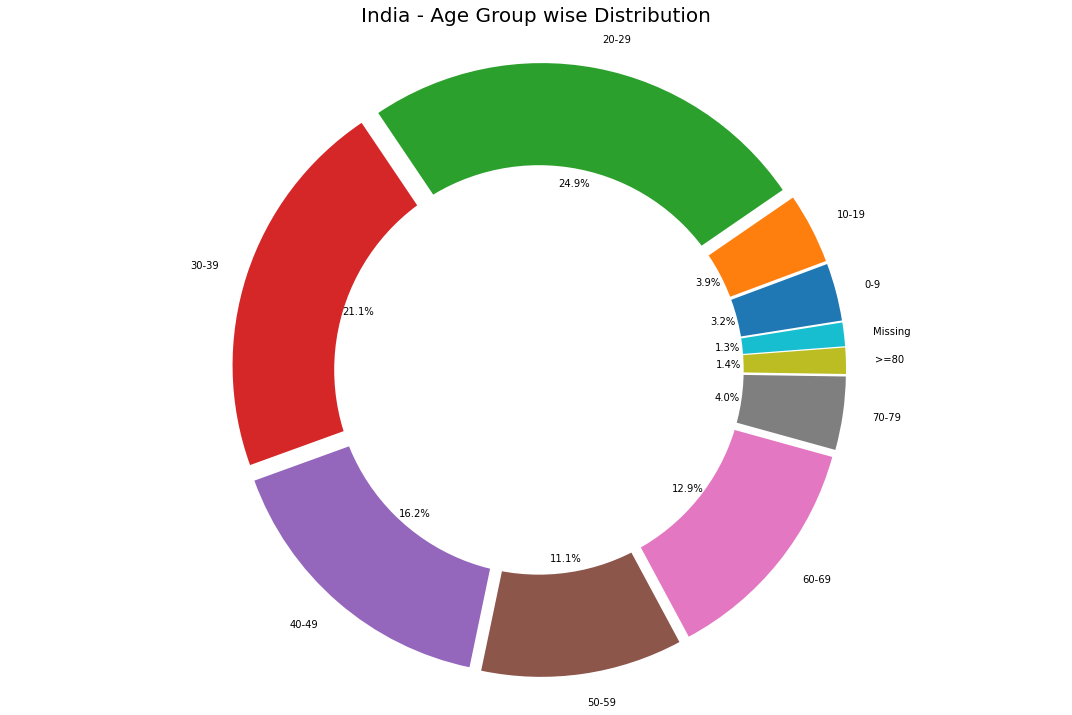

In [32]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

In [33]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

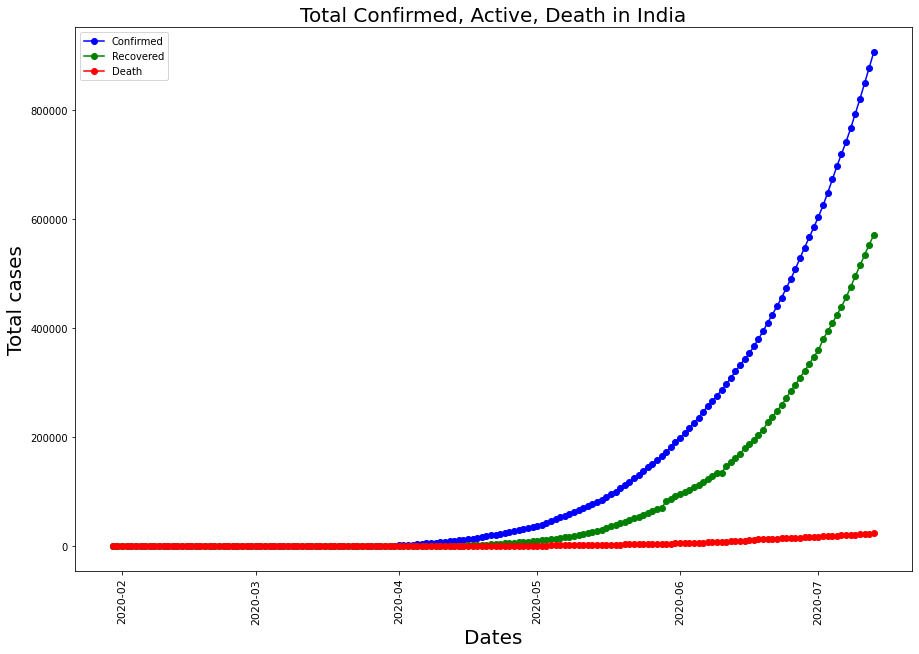

In [35]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

###Total Samples Tested

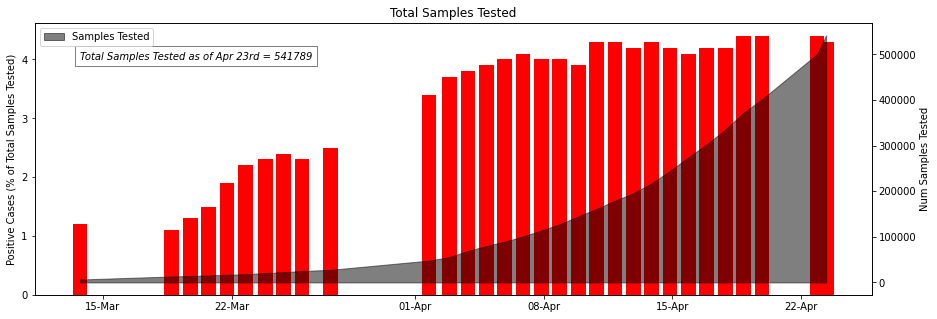

In [36]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()


##Testing LIVE Status

In [38]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [39]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,source3,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon
3052,,,,,948,,395,,,,25911,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1079040,5090,100095,1718262,583328,,09/07/2020
3053,,,,,948,,395,,,,27109,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1089040,4905,100356,1728262,593967,,10/07/2020
3054,,,,,948,,395,,,,28453,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1101040,4805,100634,1738262,605370,,11/07/2020
3055,,,,,948,,395,,,,30013,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1111040,4752,100891,1748262,617079,,12/07/2020
3056,,,,,948,,395,,,,31448,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1119040,4512,101167,1759262,627438,,13/07/2020


In [40]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [41]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [42]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [43]:
state_test_cases.head(36)

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
5,2020-01-05,Arunachal Pradesh,724,1504000,0.28%,362,0.48,
6,2020-01-05,Assam,,34293000,,,0.00,
7,2020-01-05,Bihar,24118,119520000,1.93%,52,0.20,2156
8,2020-01-05,Chandigarh,1252,1179000,7.03%,14,1.06,
9,2020-01-05,Chhattisgarh,18039,28724000,0.24%,420,0.63,575


In [44]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [45]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [46]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  34
testsperpositivecase                21
testsperthousand                    31
totalpeoplecurrentlyinquarantine    26
dtype: int64

In [48]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Andhra Pradesh,996573,52221000,7.330000,94,9.770000,nan
Maharashtra,995343,122153000,9.070000,9,9.320000,nan
Uttar Pradesh,988960,224979000,5.290000,41,3.960000,9911.000000
Rajasthan,987272,77264000,2.880000,49,9.970000,nan
Haryana,99987,28672000,5.770000,87,9.660000,50556.000000
Jharkhand,99931,37403000,1.790000,99,4.260000,99641.000000
Kerala,99692,35125000,3.380000,83,7.850000,992.000000
Madhya Pradesh,99677,82232000,9.770000,27,5.080000,nan
Bihar,99108,119520000,5.460000,95,2.670000,802.000000


###Day-by-Day Confirmed Cases in Top 15 States in India

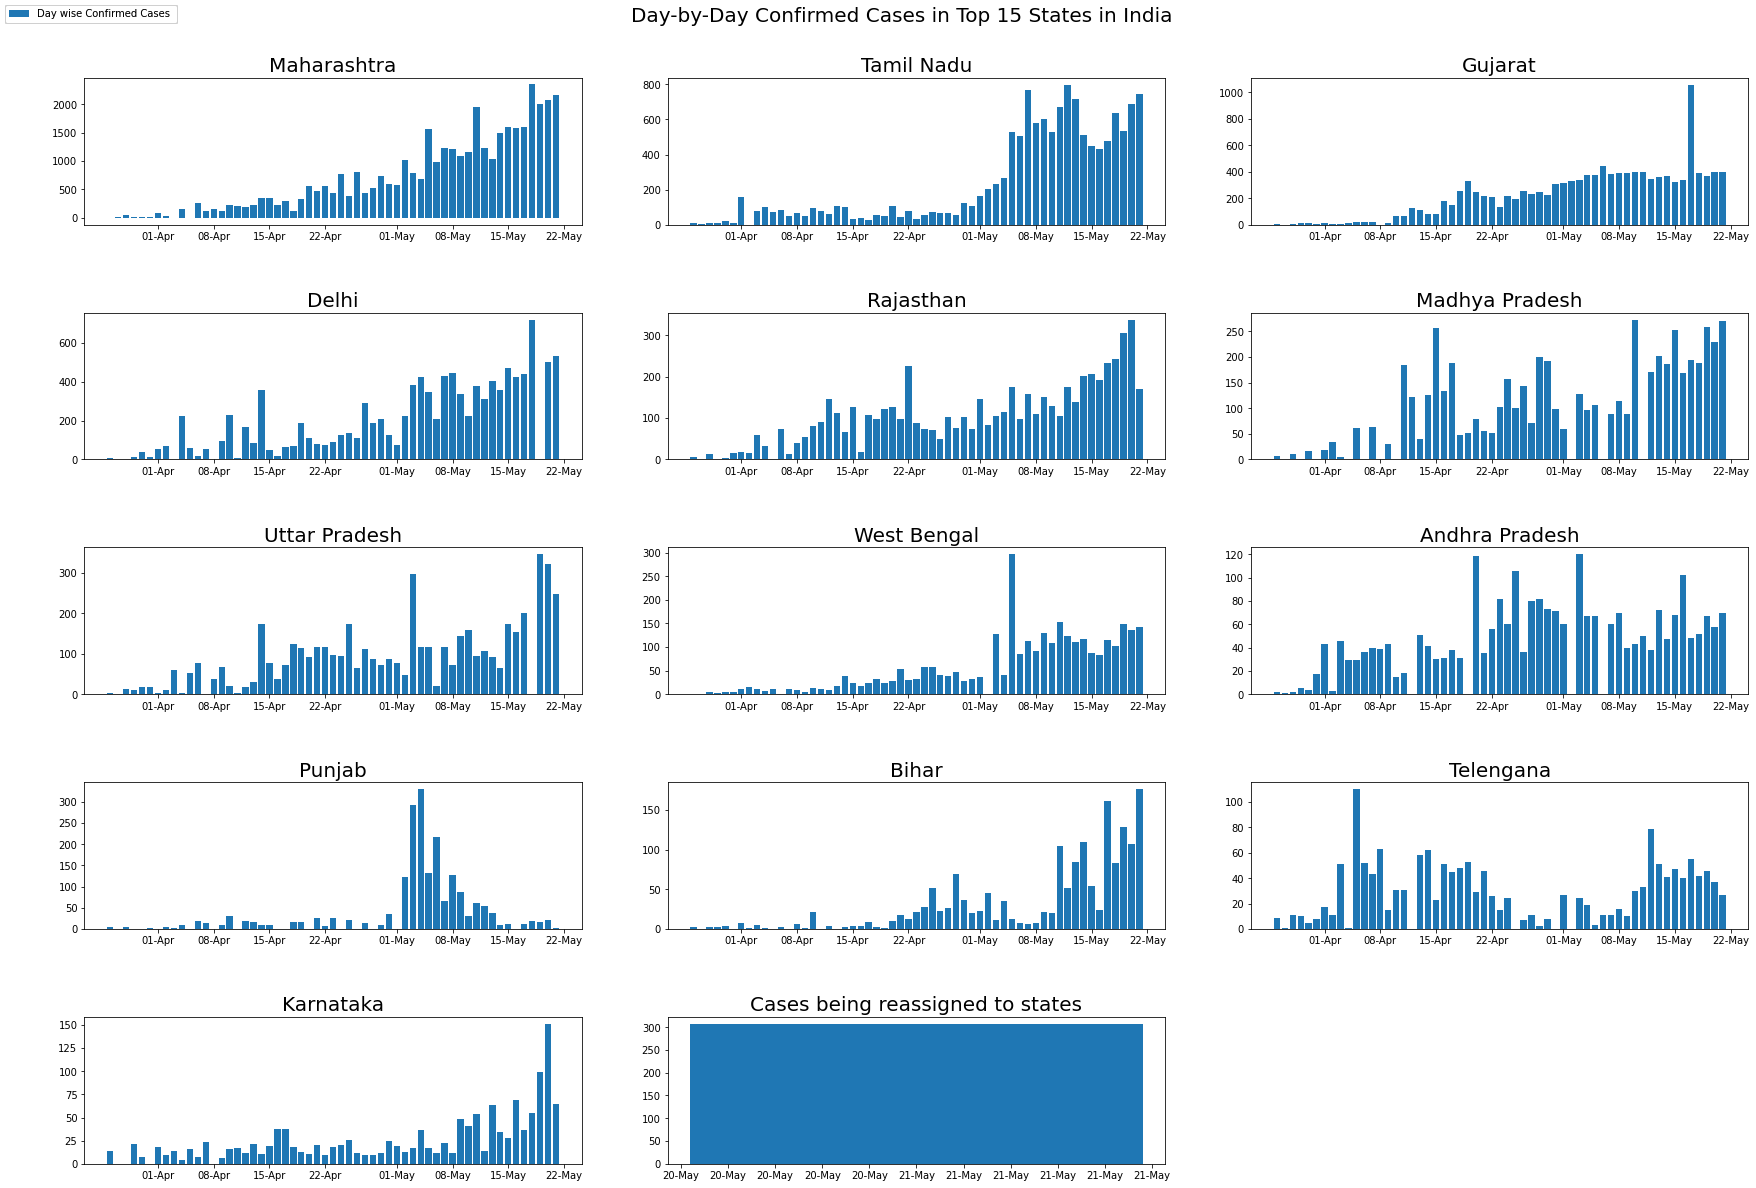

In [55]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    #states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

###Growth Rate in top 15 States in India

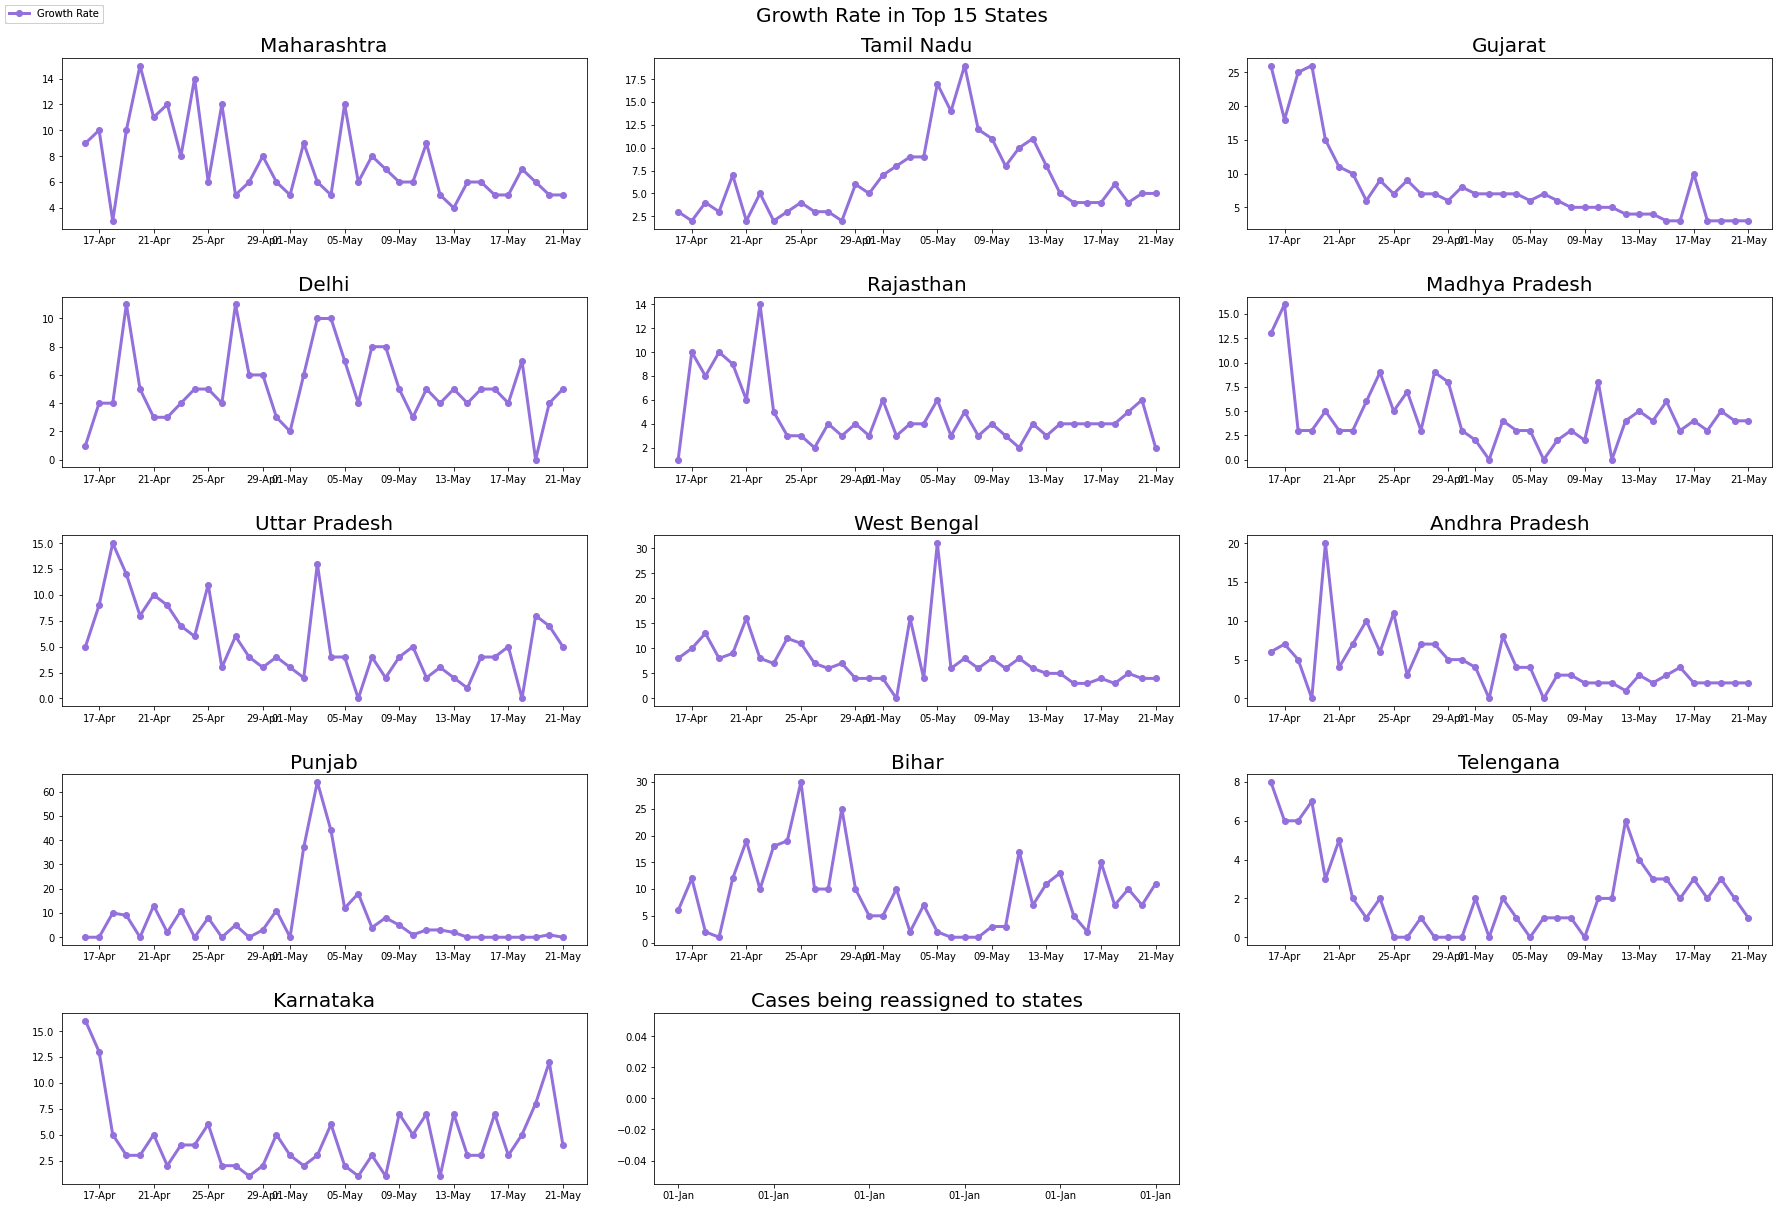

In [56]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

Though being highly populated the relative confimred cases of India is low compared to other countries. This could be because of two reasons:
- 67 days lockdown imposed by prime minister Narendra Modi in several stages (Source : [Health Ministry](http://www.indiatoday.in/india/story/without-lockdown-india-would-have-2-lakh-covid-19-cases-by-now-health-ministry-1665903-2020-04-11))
- Low testing rate (Source: [news18](https://www.news18.com/news/india/with-just-18-tests-per-million-of-population-why-indias-low-testing-rate-for-coronavirus-is-worrying-2552845.html))

###Exploring different types of hospital beds available in India during lockdown

In [57]:
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

hospital_beds = hospital_beds.drop('Sno',axis=1)

In [58]:
hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


###Exploring top 10 States in each health facilities

###Exploring Urban and Rural Healthcare Facility

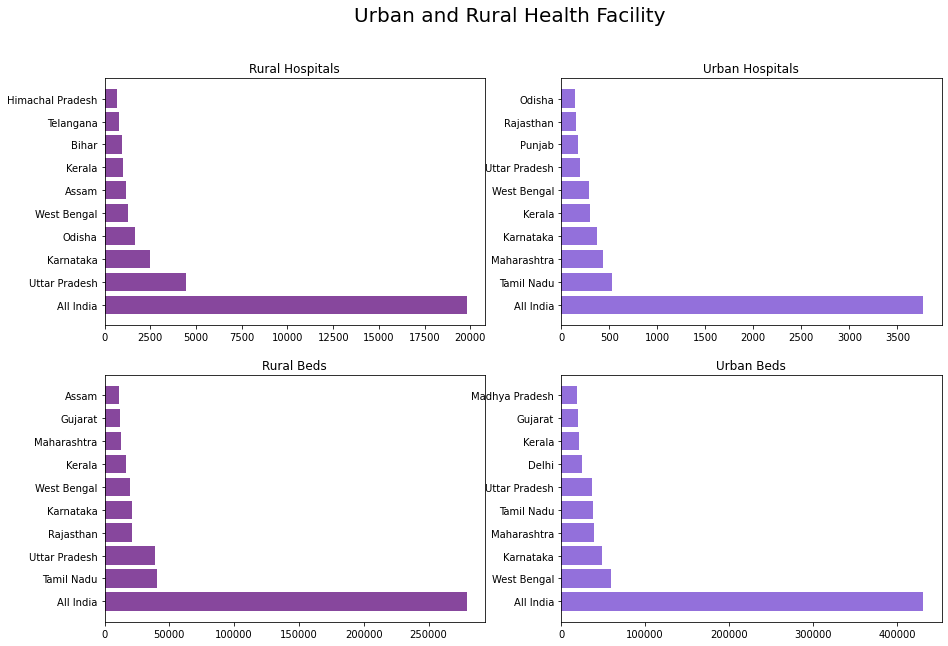

In [60]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

###Exploring Statewise Testing Insights

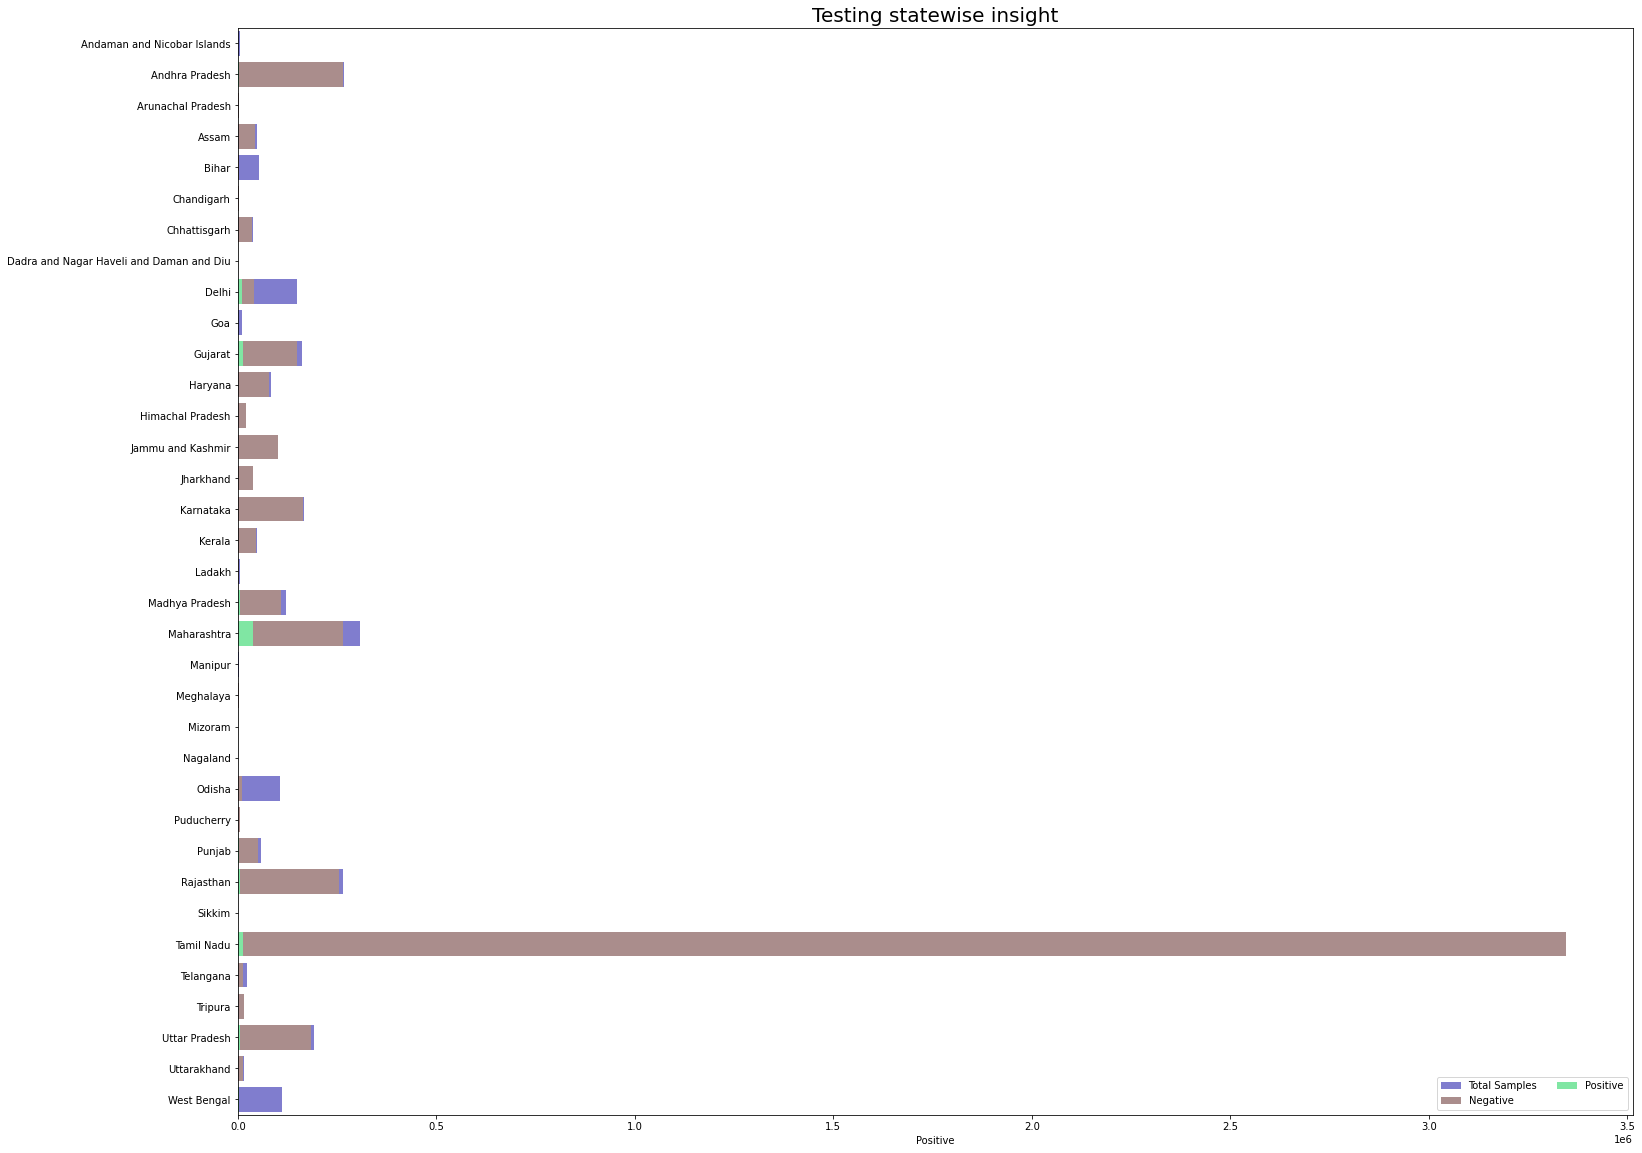

In [98]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

###Number of ICMR Testing Centres in each state

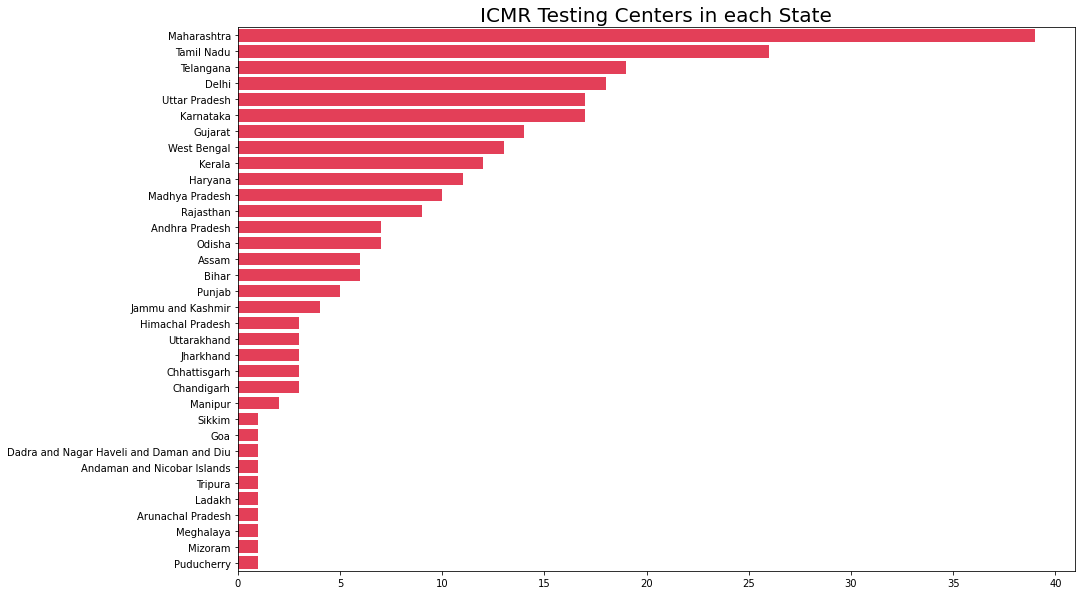

In [62]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

##Let's Start with the predictions

In [64]:
train = pd.read_csv('/content/drive/train.csv')
test = pd.read_csv('/content/drive/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])


## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [65]:
!pip install Prophet

     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=4664e47197c23e205532102b25adabccc1451d84b11214ec6fbbab1369574137
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [70]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [75]:
data.columns = ['ds','y']
data['ds'] = data['ds'].dt.date
data['ds'] = pd.to_datetime(data['ds'])


##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [76]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
174,2020-07-14
175,2020-07-15
176,2020-07-16
177,2020-07-17
178,2020-07-18
179,2020-07-19
180,2020-07-20
181,2020-07-21
182,2020-07-22
183,2020-07-23


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [77]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
184,2020-07-24,1.025840e+06,9.933716e+05,1.057727e+06
185,2020-07-25,1.043957e+06,1.012253e+06,1.075770e+06
186,2020-07-26,1.062113e+06,1.029578e+06,1.096078e+06
187,2020-07-27,1.079906e+06,1.045069e+06,1.114495e+06
188,2020-07-28,1.094061e+06,1.059813e+06,1.135230e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

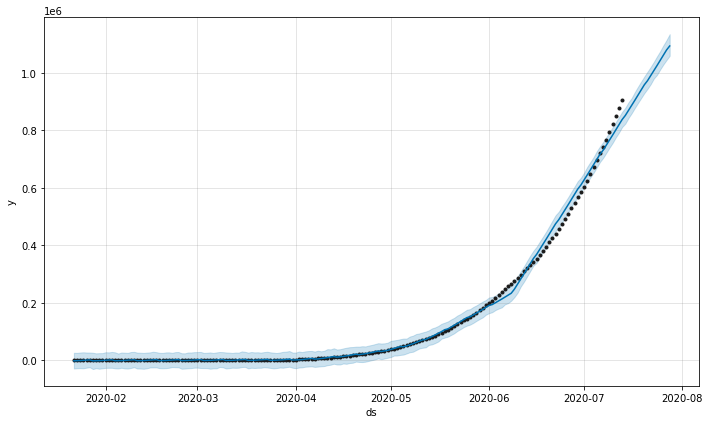

In [78]:
confirmed_forecast_plot = prop.plot(forecast)

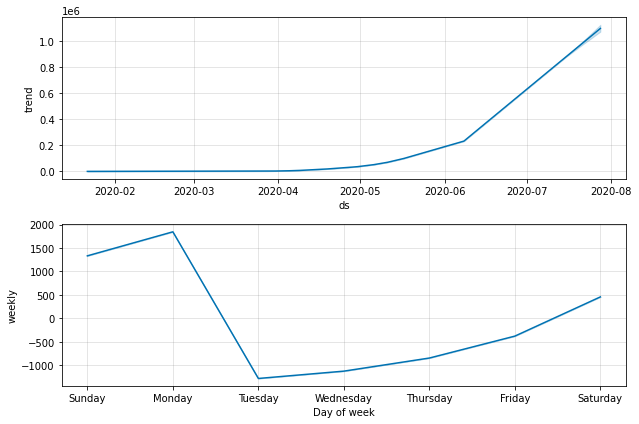

In [79]:
confirmed_forecast_plot =prop.plot_components(forecast)

##ARIMA Model

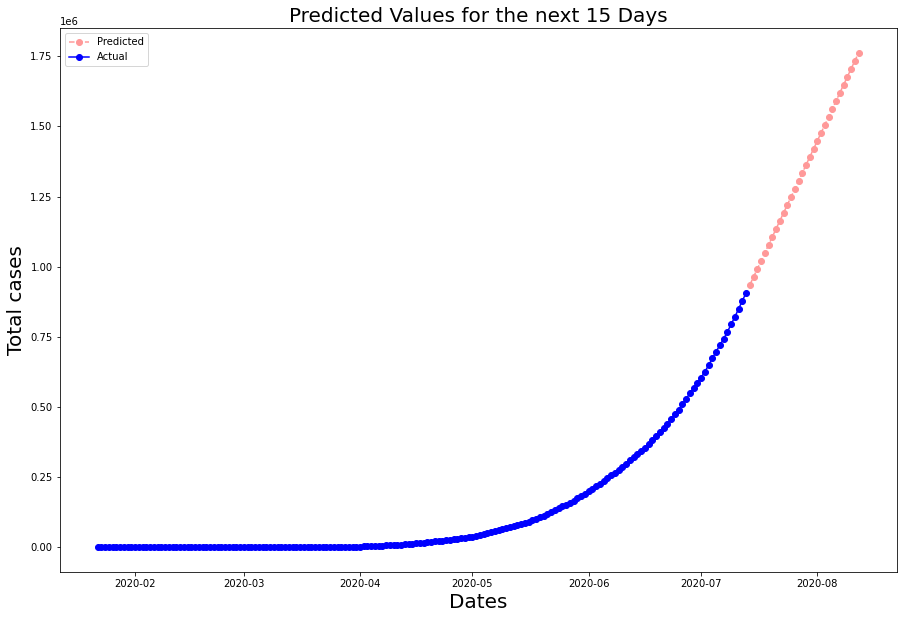

In [80]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

## 1.4 Visualising the spread geographically

#Part 3:  Exploring World wide data


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

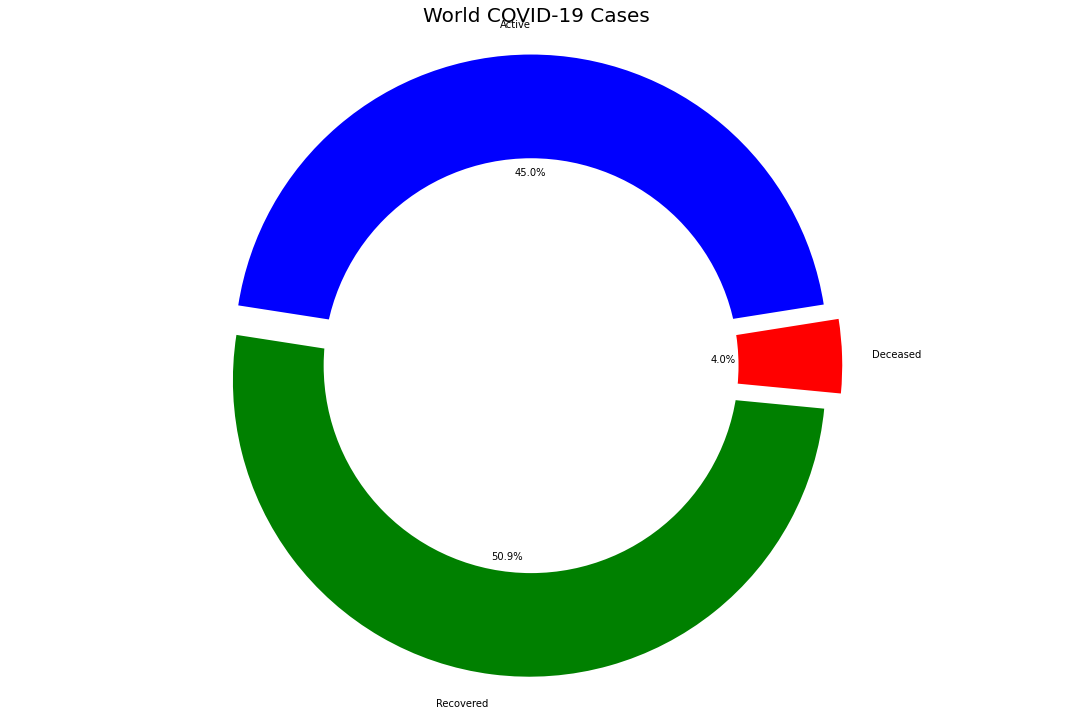

In [84]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [85]:
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

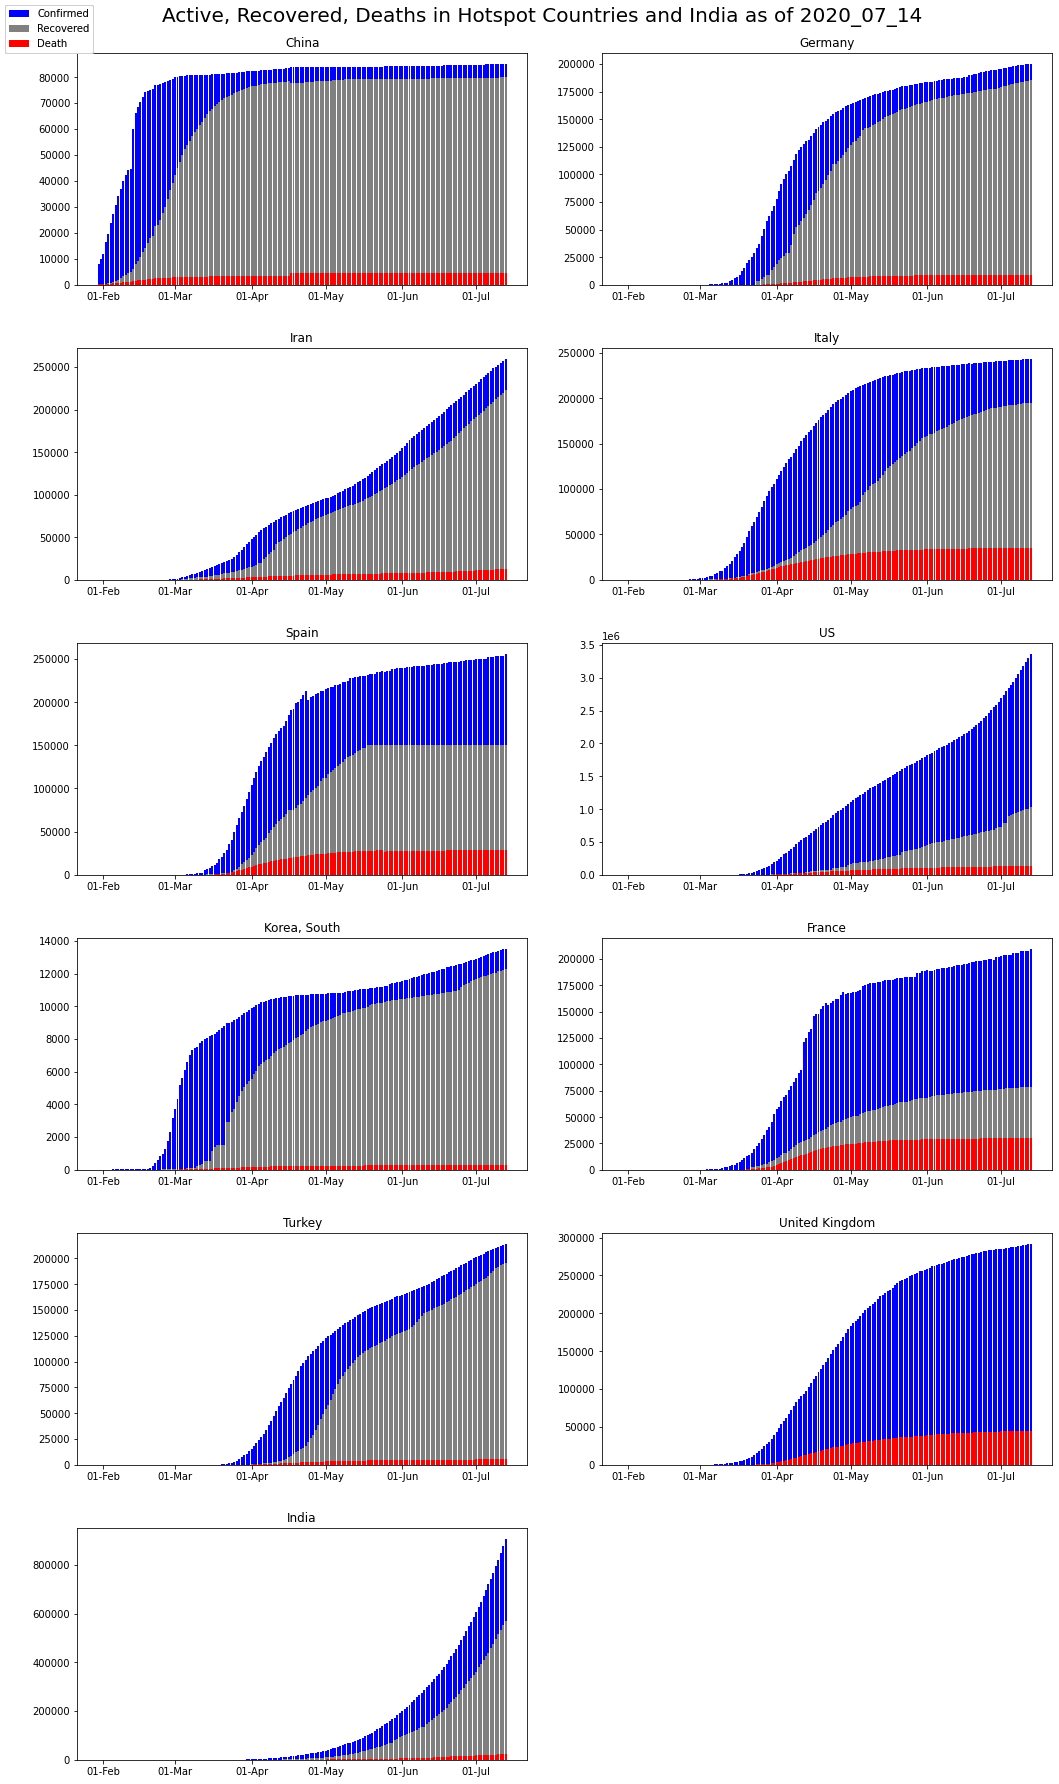

In [86]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [87]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

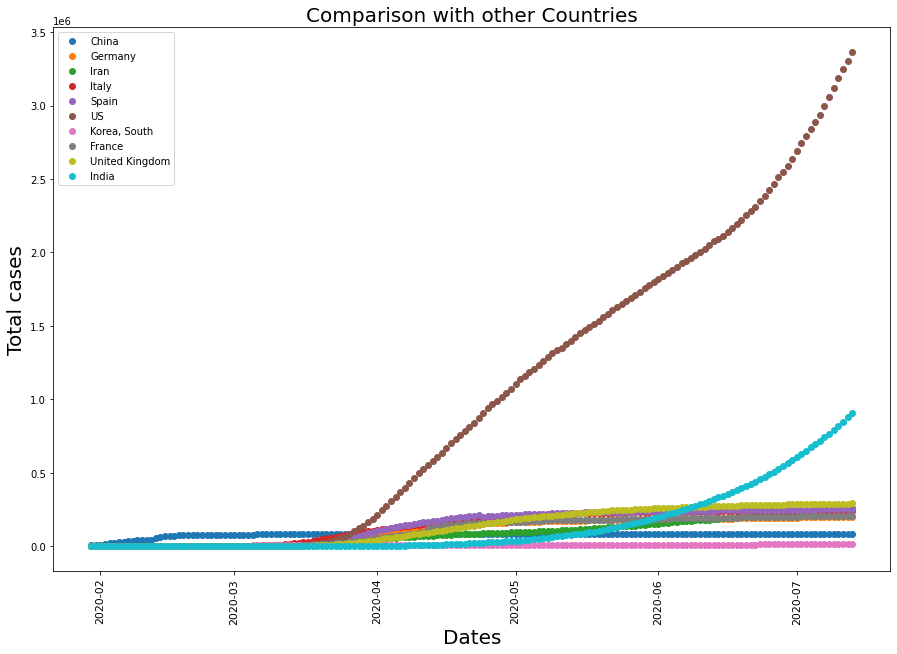

In [88]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
- https://www.worldometers.info/coronavirus/#countries
- https://api.covid19india.org/



The latest data can also be extracted from the available APIs and reading the json. Below are the API list that have been provided by crowd sourced. Extract and use these data to find meaningful insights.

- [National time series, statewise stats and test counts](https://api.covid19india.org/data.json)
- [State-district-wise](https://api.covid19india.org/state_district_wise.json)
[State-district-wise V2](https://api.covid19india.org/v2/state_district_wise.json)
- [Travel history](https://api.covid19india.org/travel_history.json)
- [Raw data](https://api.covid19india.org/raw_data.json)
- [States Daily changes](https://api.covid19india.org/states_daily.json)
- [Statewise Tested Numbers](https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv)


##Extracting data from [Hirokuapp](https://www.worldometers.info/coronavirus/#countries)

In [99]:
api = pd.read_json('https://corona-virus-stats.herokuapp.com/api/v1/cases/countries-search')

In [100]:
json_data = api['data']['rows']

In [103]:
data = json_data
data

[{'active_cases': '2,518,010',
  'cases_per_mill_pop': '581.0',
  'country': 'World',
  'country_abbreviation': '',
  'flag': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/International_Flag_of_Planet_Earth.svg/800px-International_Flag_of_Planet_Earth.svg.png',
  'new_cases': '3,077',
  'new_deaths': '269',
  'serious_critical': '45,560',
  'total_cases': '4,525,103',
  'total_deaths': '303,351',
  'total_recovered': '1,703,742'},
 {'active_cases': '1,052,654',
  'cases_per_mill_pop': '4,404.0',
  'country': 'USA',
  'country_abbreviation': 'US',
  'flag': 'https://www.worldometers.info/img/flags/us-flag.gif',
  'new_cases': '0',
  'new_deaths': '0',
  'serious_critical': '16,240',
  'total_cases': '1,457,593',
  'total_deaths': '86,912',
  'total_recovered': '318,027'},
 {'active_cases': '58,845',
  'cases_per_mill_pop': '5,831.0',
  'country': 'Spain',
  'country_abbreviation': 'ES',
  'flag': 'https://www.worldometers.info/img/flags/sp-flag.gif',
  'new_cases': '0',
  '

##Collecting Data for Statewise Insights

In [104]:
# to parse json contents
import json
# to parse csv files
import csv

In [105]:
# get response from the web page for LIVE data
response = requests.get('https://api.covid19india.org/raw_data3.json')
# get contents from the response
content = response.content
# parse the json file
parsed = json.loads(content)
# keys
parsed.keys()

dict_keys(['raw_data'])

In [106]:
# save to df
df = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df.shape)

# # list of columns
print(df.columns)

# # first few rows
df.head()

(10020, 20)
Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,,,Hospitalized,27/04/2020,,,West Bengal,1,,,Details awaited,38,27892,mohfw.gov.in,,,WB,,,
1,,,Hospitalized,27/04/2020,,Bhilwara,Rajasthan,2,,,Details awaited,2,27893,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
2,,,Hospitalized,27/04/2020,,Jaipur,Rajasthan,3,,,Details awaited,9,27894,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
3,28,,Deceased,27/04/2020,Surajpol,Jaipur,Rajasthan,4,M,,Details awaited,1,27895,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
4,,,Hospitalized,27/04/2020,,Jaisalmer,Rajasthan,5,,,Details awaited,1,27896,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,


In [107]:
# creating patient id column from patient number
# ===============================================

df['p_id'] = df['patientnumber'].apply(lambda x : 'P'+str(x))
df.columns

Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission', 'p_id'],
      dtype='object')

### Rearrange and rename columns

In [108]:
# order of columns
cols = ['patientnumber', 'p_id', 'statepatientnumber', 
        'dateannounced', 'agebracket', 'gender', 
        'detectedcity', 'detecteddistrict', 'detectedstate', 'statecode', 'nationality',
        'typeoftransmission', 'contractedfromwhichpatientsuspected',
        'statuschangedate', 'currentstatus', 'source1', 'source2', 'source3', 'notes']

# rearrange columns
df = df[cols]

# rename columns
df.columns = ['patient_number', 'p_id', 'state_patient_number', 
              'date_announced', 'age_bracket', 'gender', 
              'detected_city', 'detected_district', 'detected_state', 'state_code', 'nationality',
              'type_of_transmission', 'contracted_from_which_patient_suspected',
              'status_change_date', 'current_status', 'source1', 'source2', 'source3', 'notes']

# dataframe shape
df.shape

(10020, 19)

In [109]:
# first 3 rows of the dataframe
df.head(3)

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,nationality,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,source1,source2,source3,notes
0,27892,P27892,,27/04/2020,,,,,West Bengal,WB,,,,,Hospitalized,mohfw.gov.in,,,Details awaited
1,27893,P27893,,27/04/2020,,,,Bhilwara,Rajasthan,RJ,,,,,Hospitalized,https://twitter.com/ANI/status/125461859651442...,,,Details awaited
2,27894,P27894,,27/04/2020,,,,Jaipur,Rajasthan,RJ,,,,,Hospitalized,https://twitter.com/ANI/status/125461859651442...,,,Details awaited


### Missing values

In [110]:
# no. of empty values in each column
# ==================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]==''].shape[0])

(10020, 19) 

patient_number 	 12
p_id 	 0
state_patient_number 	 4882
date_announced 	 0
age_bracket 	 4837
gender 	 5366
detected_city 	 9599
detected_district 	 86
detected_state 	 5
state_code 	 5
nationality 	 10020
type_of_transmission 	 10020
contracted_from_which_patient_suspected 	 9779
status_change_date 	 10020
current_status 	 0
source1 	 65
source2 	 9940
source3 	 9989
notes 	 8089


In [111]:
# no. of non-empty values in each column
# ===================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]!=''].shape[0])

(10020, 19) 

patient_number 	 10008
p_id 	 10020
state_patient_number 	 5138
date_announced 	 10020
age_bracket 	 5183
gender 	 4654
detected_city 	 421
detected_district 	 9934
detected_state 	 10015
state_code 	 10015
nationality 	 0
type_of_transmission 	 0
contracted_from_which_patient_suspected 	 241
status_change_date 	 0
current_status 	 10020
source1 	 9955
source2 	 80
source3 	 31
notes 	 1931


In [112]:
# replacing empty strings with np.nan
# ==================================-

print(df.shape)

df = df.replace(r'', np.nan, regex=True)
df.isna().sum()

(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

In [113]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

print(df.shape)

# df.dropna(subset=['detected_state'], inplace=True)

print(df.shape)
df.isna().sum()

(10020, 19)
(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

### Save data

In [114]:
# save to csv`
df.to_csv('patients_data.csv', index=False)

## Collecting Some more Statewise Data

In [115]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [116]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [117]:
# save data in a dataframe
th = pd.DataFrame(parsed['states_tested_data'])

# first few rows
th

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,source3,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon
0,,,1210,,,50,,,,397000,12,https://t.me/indiacovid/2550,,,Andaman and Nicobar Islands,,Samples Sent,0.86%,3534,117,3.53,,,,,1403,181,17/04/2020
1,,,,280,,50,,,,397000,27,https://t.me/indiacovid/3147?single,,,Andaman and Nicobar Islands,Institutional,Samples Sent,1.01%,6748,99,6.75,,614,347,,2679,246,24/04/2020
2,,,,298,,50,,,,397000,33,https://t.me/indiacovid/3365?single,,,Andaman and Nicobar Islands,Institutional,Samples Sent,1.16%,7174,86,7.17,,724,420,,2848,106,27/04/2020
3,,,,340,,50,,,,397000,33,https://t.me/indiacovid/3781,,,Andaman and Nicobar Islands,Institutional,Samples Sent,0.88%,9456,114,9.46,,643,556,,3754,199,01/05/2020
4,,,,471,,98,,,,397000,33,https://t.me/indiacovid/4925,,,Andaman and Nicobar Islands,Institutional,Samples Sent,0.49%,16819,202,16.82,,16,1196,,6677,136,16/05/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,,,,,948,,395,,,,25911,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1079040,5090,100095,1718262,583328,,09/07/2020
3054,,,,,948,,395,,,,27109,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1089040,4905,100356,1728262,593967,,10/07/2020
3055,,,,,948,,395,,,,28453,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1101040,4805,100634,1738262,605370,,11/07/2020
3056,,,,,948,,395,,,,30013,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1111040,4752,100891,1748262,617079,,12/07/2020


In [118]:
th.columns

Index(['coronaenquirycalls', 'cumulativepeopleinquarantine', 'negative',
       'numcallsstatehelpline', 'numicubeds', 'numisolationbeds',
       'numventilators', 'peopleinicu', 'peopleonventilators',
       'populationncp2019projection', 'positive', 'source1', 'source2',
       'source3', 'state', 'tagpeopleinquarantine', 'tagtotaltested',
       'testpositivityrate', 'testspermillion', 'testsperpositivecase',
       'testsperthousand', 'totaln95masks', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totalppe', 'totaltested',
       'unconfirmed', 'updatedon'],
      dtype='object')

In [ ]:
# save to csv`
th.to_csv('tests_latest_state_level.csv', index=False)

In [119]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv

## Zones

In [120]:
# get response from the web page
response = requests.get('https://api.covid19india.org/zones.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['zones'])

In [121]:
zo = pd.DataFrame(parsed['zones'])
zo.head()

,district,districtcode,lastupdated,source,state,statecode,zone
0,Nicobars,AN_Nicobars,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,AN_North and Middle Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
2,South Andaman,AN_South Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Red
3,Anantapur,AP_Anantapur,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Orange
4,Chittoor,AP_Chittoor,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Red


In [122]:
# save to csv`
zo.to_csv('zones.csv', index=False)

## National level daily

In [123]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)
parsed.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [124]:
national = pd.DataFrame(parsed['cases_time_series'])
national.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [125]:
national.columns

Index(['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'date',
       'totalconfirmed', 'totaldeceased', 'totalrecovered'],
      dtype='object')

In [126]:
national = national[['date', 'totalconfirmed', 'totaldeceased', 'totalrecovered', 
                     'dailyconfirmed', 'dailydeceased', 'dailyrecovered']]
national.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,30 January,1,0,0,1,0,0
1,31 January,1,0,0,0,0,0
2,01 February,1,0,0,0,0,0
3,02 February,2,0,0,1,0,0
4,03 February,3,0,0,1,0,0


In [127]:
# save to csv`
national.to_csv('nation_level_daily.csv', index=False)

## National level latest

In [128]:
state_level = pd.DataFrame(parsed['statewise'])
state_level.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,311808,908203,23731,558,3,168,14/07/2020 11:13:06,384,572280,Total,TT,
1,105638,260924,10482,0,0,0,13/07/2020 19:41:41,297,144507,Maharashtra,MH,297 cases were marked as non-covid deaths in M...
2,48199,142798,2032,0,0,0,13/07/2020 18:28:09,0,92567,Tamil Nadu,TN,2 deaths cross notified to other states from C...
3,19017,113740,3411,0,0,0,13/07/2020 21:07:08,0,91312,Delhi,DL,Delhi bulletins contain the counts for the pre...
4,10946,42808,2056,0,0,0,13/07/2020 19:54:11,0,29806,Gujarat,GJ,


In [129]:
state_level.columns

Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes'],
      dtype='object')

In [130]:
state_level = state_level[['state', 'statecode', 'lastupdatedtime',  
                           'confirmed', 'active', 'deaths', 'recovered',
                           'deltaconfirmed', 'deltadeaths', 'deltarecovered', 'statenotes']]
state_level.head()

,state,statecode,lastupdatedtime,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered,statenotes
0,Total,TT,14/07/2020 11:13:06,908203,311808,23731,572280,558,3,168,
1,Maharashtra,MH,13/07/2020 19:41:41,260924,105638,10482,144507,0,0,0,297 cases were marked as non-covid deaths in M...
2,Tamil Nadu,TN,13/07/2020 18:28:09,142798,48199,2032,92567,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,DL,13/07/2020 21:07:08,113740,19017,3411,91312,0,0,0,Delhi bulletins contain the counts for the pre...
4,Gujarat,GJ,13/07/2020 19:54:11,42808,10946,2056,29806,0,0,0,


In [131]:
# save to csv`
state_level.to_csv('state_level_latest.csv', index=False)